# Classification model using Decision Tree

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_30_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [3]:
data = data[['RNA_ID','ImmunoPhenotype_Desert','ImmunoPhenotype_Excluded','ImmunoPhenotype_Infiltrated','ImmunoPhenotype_NA','PFS','AC005307.1', 'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9', 'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2', 'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1', 'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B', 'VN2R17P', 'XPC']]
data.head()

,RNA_ID,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA,PFS,AC005307.1,ATP5G2P1,DLGAP4,EIF4A1P9,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,0,0,1,0,12.164384,21.055379,21.300337,34.54982,21.37925,...,21.18753,27.40814,31.71139,30.26124,21.32743,29.60417,22.22154,21.9744,21.12857,32.24472
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,0,0,1,0,5.490411,21.055379,21.300337,34.06647,21.37925,...,21.18753,29.25015,29.15373,29.12730,21.32743,29.61188,22.22154,21.9744,21.12857,32.15619
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,0,0,1,0,61.906849,21.055379,21.300337,34.42561,25.08766,...,21.18753,23.03429,29.37858,27.22907,21.32743,31.90343,22.22154,21.9744,21.12857,31.86536
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,0,1,0,0,1.249315,21.055379,21.300337,34.41176,26.76156,...,21.18753,23.03429,30.19136,22.83731,21.32743,30.35424,22.22154,21.9744,21.12857,31.63561
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,0,0,0,1,5.654795,21.055379,21.300337,34.29088,21.37925,...,21.18753,23.03429,31.82172,22.83731,21.32743,31.60946,22.22154,21.9744,21.12857,33.12717


In [4]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
   

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,0:36] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

     ImmunoPhenotype_Desert  ImmunoPhenotype_Excluded  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         1   
4                         0                         0   
..                      ...                       ...   
176                       0                         0   
177                       0                         0   
178                       0                         0   
179                       0                         0   
180                       0                         0   

     ImmunoPhenotype_Infiltrated  ImmunoPhenotype_NA  AC005307.1   ATP5G2P1  \
0                              1                   0   21.055379  21.300337   
1                              1                   0   21.055379  21.300337   
2                              1                   0   21.055379  21.300337   

In [5]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
# Convert sets to arrays

XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [6]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [7]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=125, splitter='random')

In [8]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5071428571428571


### 5. Prediction

In [9]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [10]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [11]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7569444444444444
Final accuracy on the testing dataset: 0.4864864864864865


In [12]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[63  1  3]
 [ 6 12  7]
 [11  7 34]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 2 2 0 2 0 0 0 2 0 2 0 2 0 2 1 0 2 1 2 0 0 0 2 0 0 0 0 1 1 2 1 2 2 0 1 0
 0 0 2 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 2 0 2 1 0 0 0 1 0 0 0 0 2 1 0 0 2 0 0
 0 2 0 2 0 0 0 0 0 0 0 2 1 2 1 1 0 2 0 2 0 0 2 0 1 0 1 2 0 0 2 2 2 2 0 0 2
 2 2 2 1 0 2 0 2 0 0 0 2 0 0 1 1 0 0 0 0 2 0 2 0 0 0 2 0 2 0 1 0 1]


In [13]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        67
           1       0.60      0.48      0.53        25
           2       0.77      0.65      0.71        52

    accuracy                           0.76       144
   macro avg       0.72      0.69      0.70       144
weighted avg       0.75      0.76      0.75       144



In [14]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[12  0  6]
 [ 2  0  4]
 [ 6  1  6]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [2 2 0 2 2 2 2 0 0 2 2 2 0 0 2 0 2 1 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 2 2 0]


In [15]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.00      0.00      0.00         6
           2       0.38      0.46      0.41        13

    accuracy                           0.49        37
   macro avg       0.33      0.38      0.35        37
weighted avg       0.42      0.49      0.45        37



### 7. Results visualizaton

In [16]:
X = data.iloc[1:1:34]
print(X)
cols = []
for i in X:
    if i!= 'Unnamed: 0':
        cols.append(i)
print(len(cols))

Empty DataFrame
Columns: [ImmunoPhenotype_Desert, ImmunoPhenotype_Excluded, ImmunoPhenotype_Infiltrated, ImmunoPhenotype_NA, AC005307.1, ATP5G2P1, DLGAP4, EIF4A1P9, FAM172BP, FAM224A, GJA9, GPR155, GYPE, IL25, KLHL5, LANCL1-AS1, LEMD1, PCMT1, RP11-120J4.1, RP11-20G6.3, RP11-349G13.2, RP11-374M1.2, RP11-536C10.21, RP11-95G17.2, RP11-96O20.4, RP5-827C21.1, RPS12P26, SDR42E1, SNORD113-5, TARBP2, TRAV41, TRIM43B, VN2R17P, XPC]
Index: []

[0 rows x 34 columns]
34


In [17]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = cols
               )
print(texto_modelo)

|--- VN2R17P <= 23.00
|   |--- ATP5G2P1 <= 25.51
|   |   |--- RP11-95G17.2 <= 22.39
|   |   |   |--- RP11-374M1.2 <= 22.60
|   |   |   |   |--- ATP5G2P1 <= 21.17
|   |   |   |   |   |--- LEMD1 <= 26.11
|   |   |   |   |   |   |--- ImmunoPhenotype_NA <= 0.72
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- ImmunoPhenotype_NA >  0.72
|   |   |   |   |   |   |   |--- RP11-120J4.1 <= 23.93
|   |   |   |   |   |   |   |   |--- IL25 <= 24.24
|   |   |   |   |   |   |   |   |   |--- KLHL5 <= 34.37
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- KLHL5 >  34.37
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- IL25 >  24.24
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- RP11-120J4.1 >  23.93
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LEMD1 >  26.11
|   |   |   |   |   |   |--- ImmunoPhenotype_Infiltrated <= 0.79
|   |   |  

Profundidad del árbol: 10
Número de nodos terminales: 21


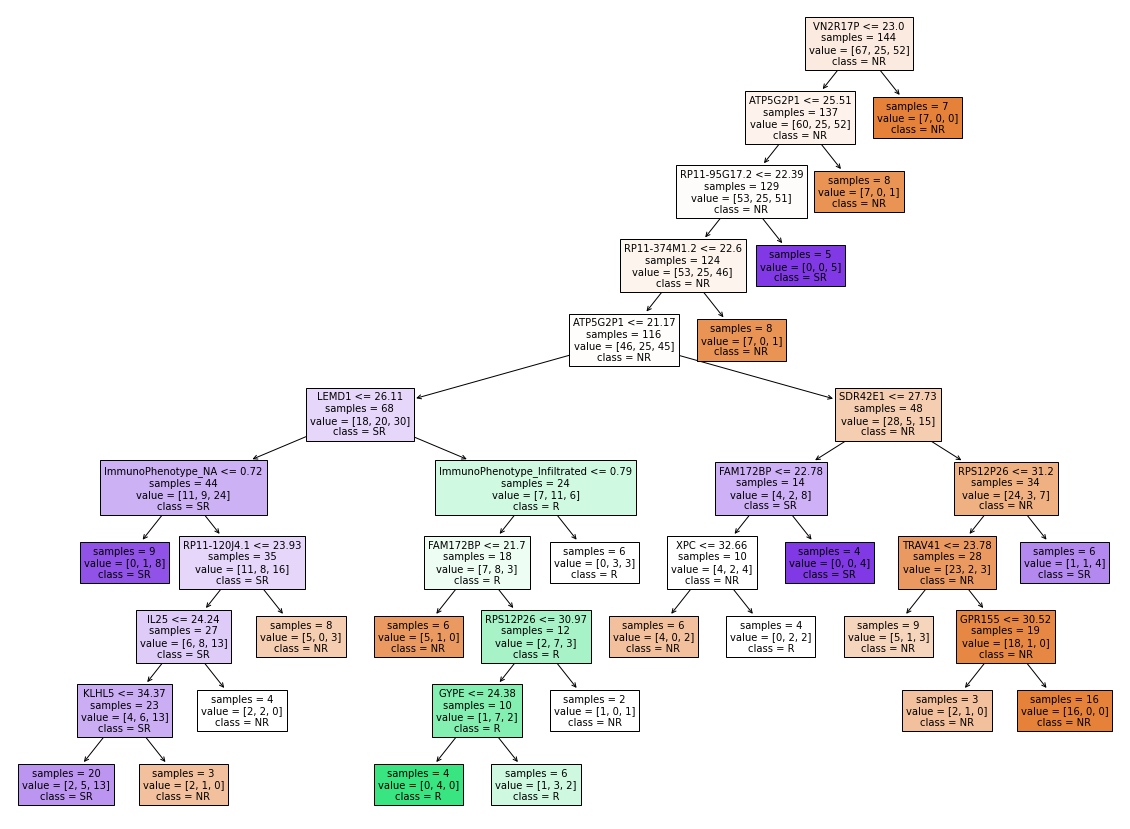

In [18]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = cols,
            class_names   = ['NR', 'R', 'SR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )